In [5]:
# imports
import networkx as nx
import pandas as pd
from networkx.algorithms import approximation
import matplotlib.pyplot as plt
import powerlaw
import collections
import numpy as np

In [6]:
# Load the data
df = pd.read_csv('./network.csv/edges.csv', usecols=['source', 'target'])
G = nx.Graph()

sourceList = df['source'].tolist()
targetList = df['target'].tolist()
# sexList = df['sex'].tolist()
added = []
for i in range(len(sourceList)):
    G.add_edges_from([(sourceList[i], targetList[i])])
    added.append((sourceList[i], targetList[i]))

largest_cc = max(nx.connected_components(G), key=len)
Gcc = G.subgraph(largest_cc)

# Degree distribution plots

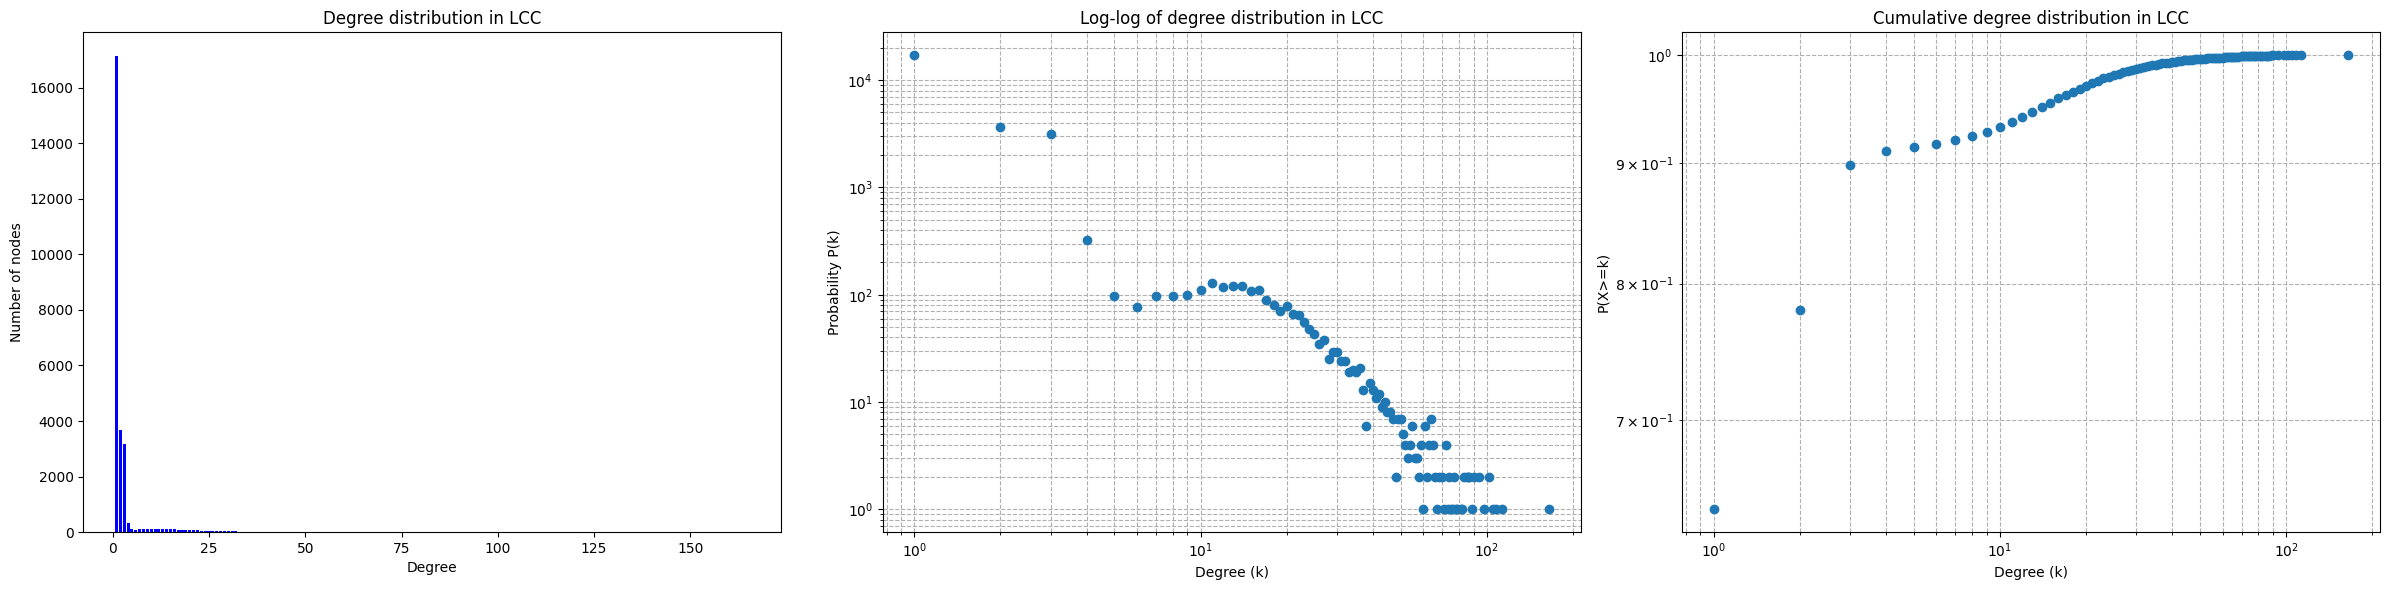

In [7]:
# Assuming 'Gcc' is your largest connected component subgraph
degrees = [degree for node, degree in Gcc.degree()]
degree_sequence_sorted = sorted(degrees, reverse=True)  # Sorted degree sequence
degreeCount = collections.Counter(degree_sequence_sorted)
deg, cnt = zip(*degreeCount.items())

# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1: Standard degree distribution histogram
axs[0].bar(deg, cnt, width=0.80, color='b')
axs[0].set_title('Degree distribution in LCC')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Number of nodes')

# Plot 2: Log-log plot of the degree distribution
axs[1].loglog(deg, cnt, linestyle='None', marker='o')
axs[1].set_title('Log-log of degree distribution in LCC')
axs[1].set_xlabel('Degree (k)')
axs[1].set_ylabel('Probability P(k)')
axs[1].set_xscale('log')  # Set x-axis to log scale
axs[1].set_yscale('log')  # Set y-axis to log scale
axs[1].grid(True, which="both", ls="--")

# Plot 3: Cumulative degree distribution on a log-log scale
cum_degrees = np.array(list(degreeCount.values()))
cum_degrees = np.cumsum(cum_degrees[::-1])[::-1]
cum_degrees = cum_degrees / cum_degrees[0]
axs[2].loglog(deg, cum_degrees, linestyle='None', marker='o')
axs[2].set_title('Cumulative degree distribution in LCC')
axs[2].set_xlabel('Degree (k)')
axs[2].set_ylabel('P(X>=k)')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].grid(True, which="both", ls="--")



# Adjust layout
plt.tight_layout()
plt.show()

# Power Law


Calculating best minimal value for power law fit


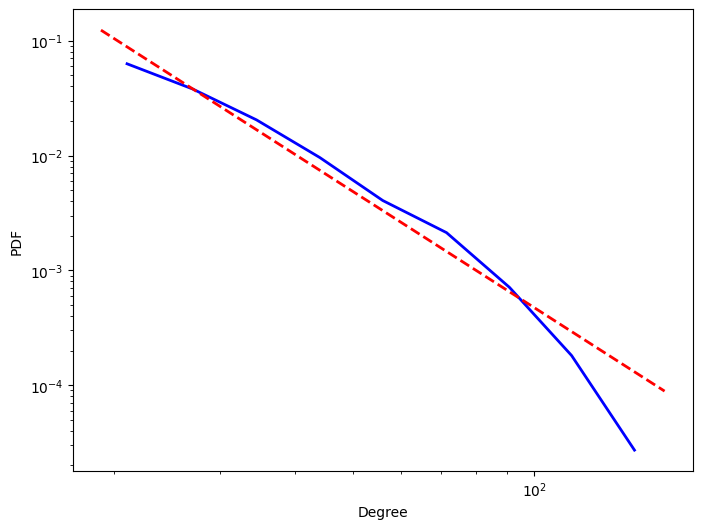

R = 1.9073893393806884, p = 0.05647018884603866


In [8]:
# Fit the power-law distribution to the network's degree distribution
degree_sequence = [degree for node, degree in G.degree()]
fit = powerlaw.Fit(degree_sequence)

# Plot the degree distribution on a log-log scale
plt.figure(figsize=(8, 6))
fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', linewidth=2)
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.show()

# Perform a goodness-of-fit test and compare the power-law model to the exponential model
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(f'R = {R}, p = {p}')

# Interpret the result
# A positive, significant R value suggests the data is more likely to follow a power-law distribution
# A p-value < 0.05 typically indicates that the result is statistically significant